In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

In [2]:
import dinamica as dyn
import cinematica as kn

In [3]:
n=4
t=5
k=2000

Le posizioni iniziali sono determinate di seguito prendendo delle coordinate casuali tra 0 e 1. Per fare in modo che occupino lo spazio dato dagli assi (tra -2 e 2) del grafico si toglie 1/2 e si moltiplica per 2.

Le velocità sono casuali anch'esse.

Le masse sono casuali.

In [4]:
x=(np.random.rand(n)-.5)*2
y=(np.random.rand(n)-.5)*2

In [5]:
Vx=(np.random.rand(n)-.5)
Vy=(np.random.rand(n)-.5)

In [6]:
masse = np.random.rand(n)/5.

In [7]:
T = t / k

In [8]:
posizioni = np.zeros((2, k, n))

In [9]:
posizioni[0,0,:] = x
posizioni[1,0,:] = y

In [10]:
for i in range(k):
    a_x, a_y = dyn.calcolaAccelerazioni(x, y, masse)

    Vx, Vy = kn.velocita(Vx, Vy, a_x, a_y, T)

    x, y = kn.posizione(x, y, Vx, Vy, T)
    posizioni[0,i,:] = x
    posizioni[1,i,:] = y

## Animazione

Il codice riportato qui sotto si può tranquillamente "copiare" in vari siti, per esemptio [qui](http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/).

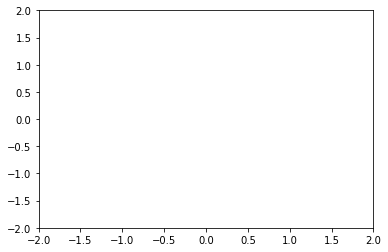

In [11]:
fig, ax = plt.subplots()

ax.set_xlim(( -2, 2))
ax.set_ylim(( -2, 2))

line, = ax.plot([], [], 'o')

In [12]:
def inizializza():
    line.set_data([], [])
    return (line,)

In [13]:
def anima(m):
    x = posizioni[0, m, :]
    y = posizioni[1, m, :]
    line.set_data(x, y)
    return (line,)

In [14]:
# questo codice serve per salvare il video come file .mp4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='CorsoPython'), bitrate=1800)

In [15]:
anim = animation.FuncAnimation(fig, anima, init_func=inizializza,
                               frames=k, interval=20, blit=True)
anim.save('im.mp4', writer=writer)
#HTML(anim.to_html5_video())